# Definindo a Arquitetura do Modelo GoogLeNet

![GoogleNet](https://miro.medium.com/v2/resize:fit:4800/format:webp/0*q5eMDjUHKqEyo7qY.png)

O modelo GoogLeNet, também conhecido como Inception-v1, é uma arquitetura de rede neural convolucional (CNN) profundamente empilhada que foi projetada para tarefas de visão computacional, como classificação de imagens e detecção de objetos. Foi desenvolvido pela equipe do Google Research e ganhou notoriedade ao vencer a competição ILSVRC (ImageNet Large Scale Visual Recognition Challenge) em 2014, demonstrando uma precisão excepcional na classificação de imagens.

Antes do GoogLeNet, redes neurais profundas estavam enfrentando alguns desafios significativos, como problemas de `Vanish/Explode Gradient`, e também eram `computacionalmente caras de treinar para época`. O GoogLeNet foi uma resposta inovadora a esses desafios e introduziu várias técnicas revolucionárias, tornando-se um marco na história das redes neurais convolucionais.

### Funcionamento do GoogLeNet:

O GoogLeNet é conhecido por sua arquitetura altamente modular e pela introdução do conceito de "módulo Inception", que é o bloco fundamental da rede. A ideia por trás do `módulo Inception` é a seguinte: `em vez de escolher manualmente o tamanho das convoluções e das janelas de pooling em uma rede, o módulo Inception realiza várias operações de convolução e pooling de diferentes tamanhos e, em seguida, concatena as saídas`. Isso permite que a rede aprenda a extrair características em várias escalas e resoluções.

Aqui estão os principais componentes e conceitos do GoogLeNet:

* Módulo Inception: Cada módulo Inception é composto por várias operações de convolução e pooling com diferentes tamanhos de kernel (1x1, 3x3, 5x5) e também uma operação de max-pooling. As saídas de todas essas operações são concatenadas ao longo do eixo de profundidade e formam a saída do módulo Inception. Isso permite que a rede capture características em diferentes escalas e resoluções.

* Camadas de Pooling: O GoogLeNet utiliza camadas de pooling para reduzir progressivamente as dimensões espaciais da imagem de entrada, o que ajuda a diminuir a carga computacional e a aumentar a representação das características aprendidas.

* Camada de Classificação Global Average Pooling (GAP): Em vez de usar camadas totalmente conectadas tradicionais no final da rede, o GoogLeNet emprega uma camada GAP. Ela calcula a média global das características em vez de usar um grande número de neurônios totalmente conectados. Isso reduz drasticamente o número de parâmetros da rede, evitando o overfitting.

* Regularização e Dropout: O GoogLeNet utiliza regularização por meio de dropout para combater o overfitting. Isso ajuda a melhorar a generalização do modelo.

* Conexões Residuais (ResNets): Embora o GoogLeNet em si não tenha introduzido conexões residuais, a ideia das conexões residuais (ResNets) se tornou popular e é frequentemente usada em arquiteturas posteriores, como o ResNet.

Em resumo, o GoogLeNet é uma arquitetura de rede neural convolucional altamente eficaz que introduziu o conceito de módulo Inception para melhorar a extração de características em diferentes escalas. Ele contribuiu significativamente para o avanço das redes neurais profundas na visão computacional e estabeleceu um marco importante na história da inteligência artificial. Desde então, várias variantes e melhorias foram desenvolvidas com base no GoogLeNet, tornando-se uma base para arquiteturas mais modernas de CNNs.

In [ ]:
!pip install watermark sklearn==1.2.2

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, concatenate, Dropout, Flatten, Dense

# Definindo a função do bloco Inception
def inception_module(x, filters):
    conv1x1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    conv3x3 = Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)

    conv5x5 = Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)

    maxpool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    maxpool_1x1 = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(maxpool)

    inception_output = concatenate([conv1x1, conv3x3, conv5x5, maxpool_1x1], axis=-1)

    return inception_output

# Definindo a arquitetura do modelo GoogLeNet
def googlenet(input_shape, num_classes):
    input_layer = Input(shape=input_shape)

    # Etapa inicial
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Etapa 1
    x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Etapa 2
    x = inception_module(x, [64, 96, 128, 16])
    x = inception_module(x, [128, 128, 192, 32])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Etapa 3
    x = inception_module(x, [192, 96, 208, 16])
    x = inception_module(x, [160, 112, 224, 24])
    x = inception_module(x, [128, 128, 256, 24])
    x = inception_module(x, [112, 144, 288, 32])
    x = inception_module(x, [256, 160, 320, 32])

    # Removendo a camada de AveragePooling2D e substituindo por GlobalAveragePooling2D
    x = GlobalAveragePooling2D()(x)

    x = Dropout(0.4)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output)

    return model

# Criando uma instância do modelo GoogLeNet
input_shape = (32, 32, 3)  # Dimensões de entrada das imagens
num_classes = 10  # Número de classes
model = googlenet(input_shape, num_classes)

# Sumário do modelo
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 16, 16, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 8, 8, 64)             0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 8, 8, 64)             4160      ['max_pooling2d[0][0]']   

# Carregando e Pré-processando os Dados

Primeiro, importamos as bibliotecas necessárias e carregamos o conjunto de dados CIFAR-10. Em seguida, realizamos o pré-processamento dos dados, que envolve a normalização das imagens e a codificação one-hot dos rótulos.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Carregar o conjunto de dados CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Pré-processamento dos dados
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


170498071/170498071 [==============================] - 4s 0us/step


# Compilando o Modelo

Compilamos o modelo especificando o otimizador, a função de perda e as métricas que serão usadas para avaliar o desempenho do modelo.

In [ ]:
# Criar uma instância do modelo GoogLeNet
model = googlenet(input_shape, num_classes)

# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do Modelo com Data Augmentation

Definimos os parâmetros de treinamento, criamos um objeto `ImageDataGenerator `para aplicar data augmentation e, em seguida, treinamos o modelo.

In [ ]:
# Definir parâmetros do treinamento
batch_size = 128
epochs = 10

# Criar um objeto ImageDataGenerator para aplicar data augmentation
datagen = ImageDataGenerator(rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)

# Treinar o modelo com data augmentation
datagen.fit(x_train)
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))




Epoch 1/10
390/390 [==============================] - 71s 119ms/step - loss: 2.1679 - accuracy: 0.1426 - val_loss: 1.9279 - val_accuracy: 0.1990
Epoch 2/10
390/390 [==============================] - 44s 112ms/step - loss: 1.8477 - accuracy: 0.2643 - val_loss: 1.6421 - val_accuracy: 0.3749
Epoch 3/10
390/390 [==============================] - 43s 109ms/step - loss: 1.5803 - accuracy: 0.4074 - val_loss: 1.4294 - val_accuracy: 0.4714
Epoch 4/10
390/390 [==============================] - 43s 109ms/step - loss: 1.4097 - accuracy: 0.4882 - val_loss: 1.2950 - val_accuracy: 0.5253
Epoch 5/10
390/390 [==============================] - 43s 109ms/step - loss: 1.2965 - accuracy: 0.5347 - val_loss: 1.2439 - val_accuracy: 0.5446
Epoch 6/10
390/390 [==============================] - 42s 109ms/step - loss: 1.2291 - accuracy: 0.5615 - val_loss: 1.1154 - val_accuracy: 0.6015
Epoch 7/10
390/390 [==============================] - 44s 113ms/step - loss: 1.1581 - accuracy: 0.5874 - val_loss: 1.0828 - val_ac

# Avaliação do Modelo

Avaliamos o modelo treinado no conjunto de teste para calcular a perda e a precisão.

In [ ]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 - 4s - loss: 0.9862 - accuracy: 0.6527 - 4s/epoch - 12ms/step
Test Loss: 0.9861540198326111
Test Accuracy: 0.6527000069618225


1/1 [==============================] - 0s 45ms/step
[[0.00216748 0.00076229 0.03599249 0.28492463 0.04306527 0.4562232
  0.01436301 0.15851304 0.00052804 0.00346058]]


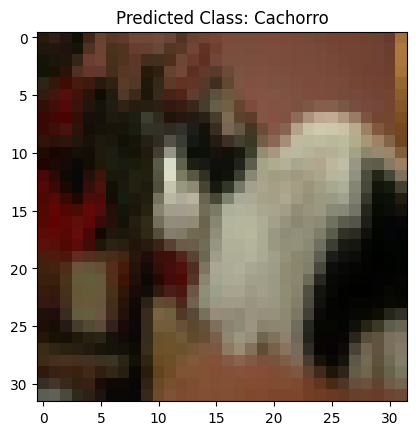

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mapeamento das classes do CIFAR-10 para os nomes das classes
class_names = [
    "Avião", "Automóvel", "Pássaro", "Gato", "Cervo",
    "Cachorro", "Sapo", "Cavalo", "Navio", "Caminhão"
]

test_image = x_test[78]
predicted_probabilities = model.predict(np.expand_dims(test_image, axis=0))
print(predicted_probabilities)
predicted_label = np.argmax(predicted_probabilities)

plt.imshow(test_image)
plt.title(f'Predicted Class: {class_names[predicted_label]}')
plt.show()
